In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

df = pd.read_csv('./sample_data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [103]:
target = df["Outcome"]
data = df.drop(['Outcome'], axis=1, inplace=False)

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    data, target, random_state=42)

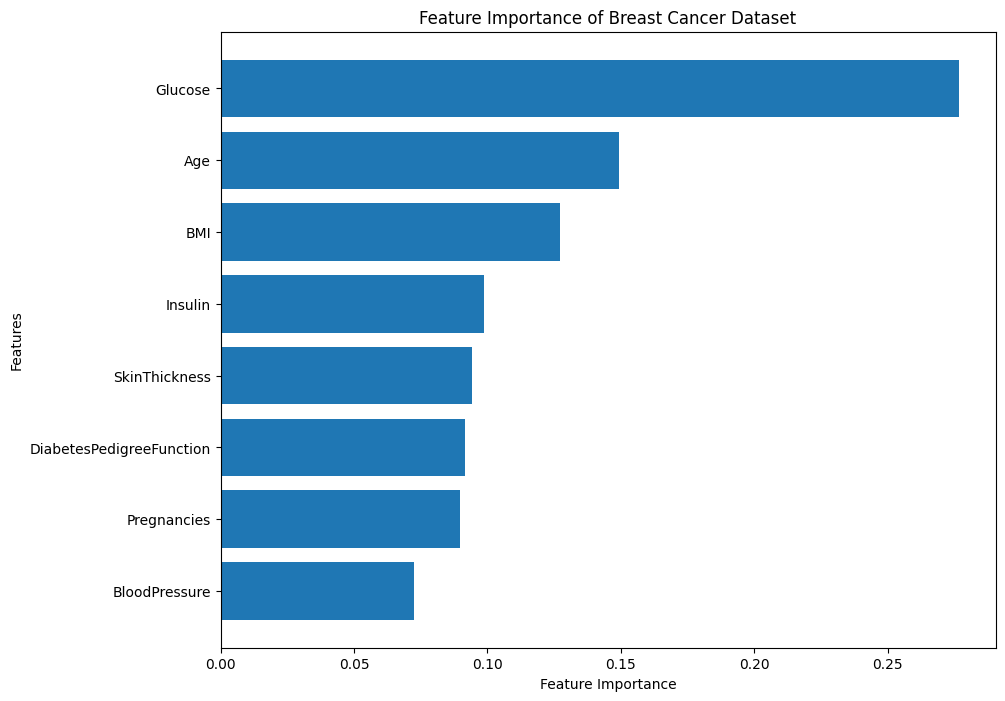

In [105]:
import xgboost as xgb
from matplotlib import pyplot as plt

model = xgb.XGBClassifier()
model.fit(train_input, train_target)

feature_importances = model.feature_importances_

# Feature importances와 feature 이름을 함께 사용하여 정렬
sorted_idx = feature_importances.argsort()
sorted_importances = feature_importances[sorted_idx]
sorted_features = data.columns[sorted_idx]

# Feature importance 그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance of Breast Cancer Dataset")
plt.show()

In [106]:
from sklearn.preprocessing import StandardScaler

train_input = train_input[['Glucose','Age','BMI']]
test_input = test_input[['Glucose','Age','BMI']]
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(1, input_dim=3, activation="sigmoid", kernel_regularizer=regularizers.l2(0.02)))

optimizer = Adam(learning_rate=0.003)

model.compile(optimizer=optimizer, loss="binary_crossentropy")

print(train_scaled.shape)
print(train_target.shape)
print(train_scaled)

model.fit(train_scaled, train_target, epochs=3000, verbose=0)

(576, 3)
(576,)
[[ 0.25977903  0.96352088  1.03974028]
 [ 0.25977903 -0.86295593  0.40945373]
 [-1.85825286  1.13747105  0.31753694]
 ...
 [-0.61235174  0.44167036  1.78820556]
 [ 0.63354937 -0.34110542  1.36801453]
 [ 0.13518892 -1.03690611 -1.24504846]]


In [108]:
from sklearn.metrics import accuracy_score

train_predictions = model.predict(train_scaled)
test_predictions = model.predict(test_scaled)

# 이진 분류를 위한 임계값 적용 (0.5 기준)
train_predicted_classes = (train_predictions > 0.5).astype("int32")
test_predicted_classes = (test_predictions > 0.5).astype("int32")

# 정확도 계산
train_accuracy = accuracy_score(train_target, train_predicted_classes)
print(f"Train Accuracy: {train_accuracy}")
test_accuracy = accuracy_score(test_target, test_predicted_classes)
print(f"Test Accuracy: {test_accuracy}")

6/6 [==============================] - 0s 3ms/step
Train Accuracy: 0.7795138888888888
Test Accuracy: 0.734375


In [109]:
# Keras 모델 예측
keras_train_predictions = model.predict(train_scaled).flatten()
keras_test_predictions = model.predict(test_scaled).flatten()

# XGBoost 모델 정의 및 학습
xgb_model = xgb.XGBClassifier()
xgb_model.fit(train_scaled, train_target)

# XGBoost 모델 예측
xgb_train_predictions = xgb_model.predict_proba(train_scaled)[:, 1]
xgb_test_predictions = xgb_model.predict_proba(test_scaled)[:, 1]

# 예측 결과 결합 (평균)
combined_train_predictions = (keras_train_predictions + xgb_train_predictions) / 2
combined_test_predictions = (keras_test_predictions + xgb_test_predictions) / 2

# 이진 분류를 위한 임계값 적용 (0.5 기준)
combined_train_predicted_classes = (combined_train_predictions > 0.5).astype("int32")
combined_test_predicted_classes = (combined_test_predictions > 0.5).astype("int32")

# 정확도 계산
train_accuracy = accuracy_score(train_target, combined_train_predicted_classes)
test_accuracy = accuracy_score(test_target, combined_test_predicted_classes)
print(f"Combined Train Accuracy: {train_accuracy}")
print(f"Combined Test Accuracy: {test_accuracy}")

6/6 [==============================] - 0s 3ms/step
Combined Train Accuracy: 0.9652777777777778
Combined Test Accuracy: 0.7083333333333334
